In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Display first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Column info
df.info()

# Check missing values
print("\nMissing values:\n", df.isnull().sum())


Dataset shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           

In [8]:
# Basic statistics (for numeric columns)
print(df.describe())

# Check unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
show_id: 8807 unique values
type: 2 unique values
title: 8807 unique values
director: 4529 unique values
cast: 7693 unique values
country: 749 unique values
date_added: 1768 unique values
release_year: 74 unique values
rating: 18 unique values
duration: 220 unique values
listed_in: 514 unique values
description: 8775 unique values


In [14]:
# Handle missing values safely 
df = df.fillna({
    'country': 'Unknown',
    'director': 'Unknown',
    'cast': 'Unknown',
    'rating': 'Unknown',
    'date_added': 'Unknown'
})


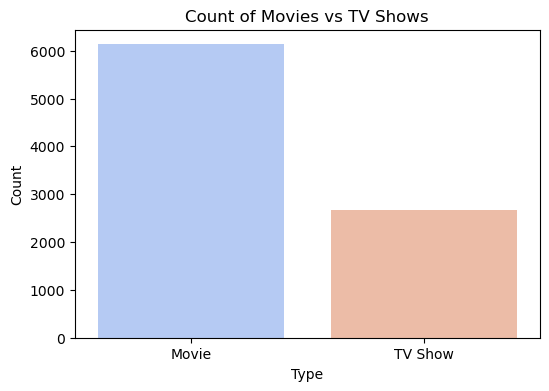

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, hue='type', palette='coolwarm', legend=False)
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


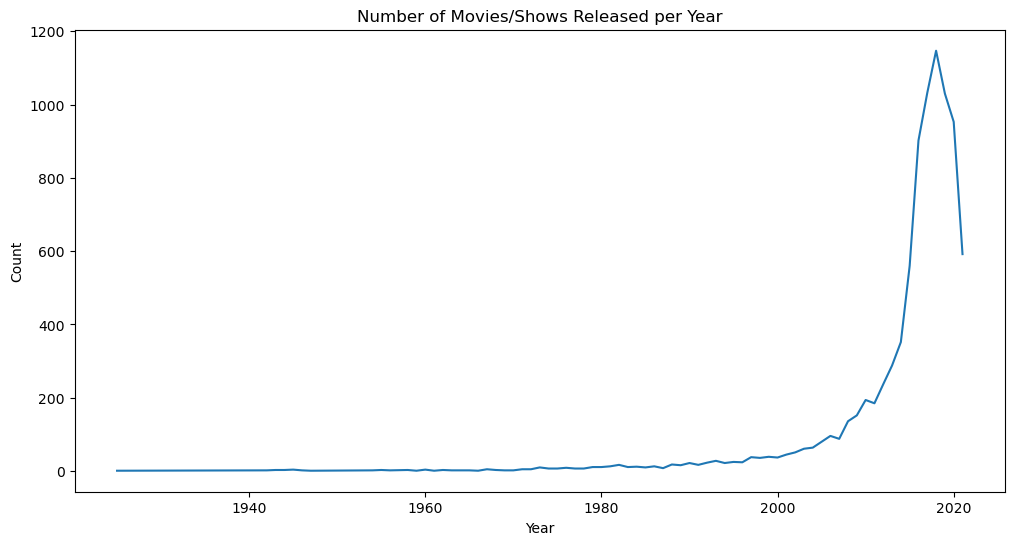

In [18]:
plt.figure(figsize=(12,6))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title("Number of Movies/Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


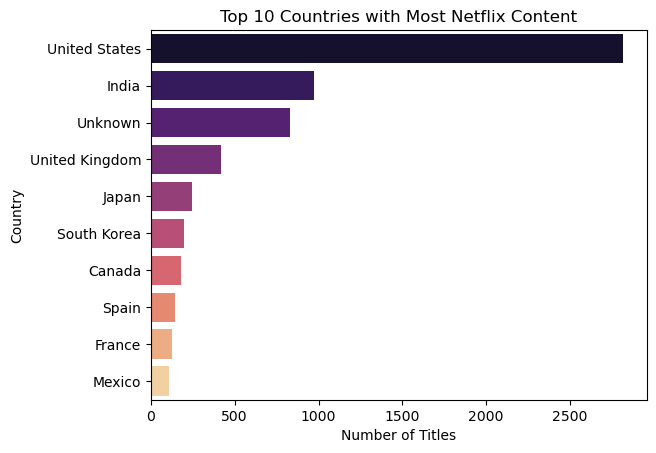

In [21]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='magma', legend=False)

plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


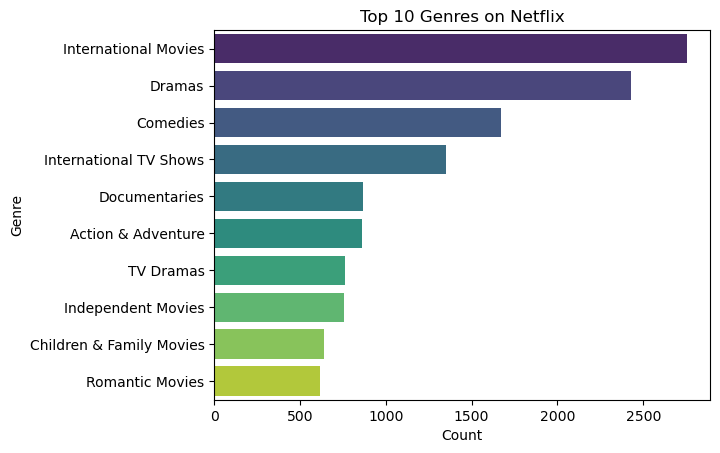

In [25]:
# Split genres and count
from collections import Counter
genres = df['listed_in'].dropna().apply(lambda x: x.split(','))
flat_genres = [g.strip() for sublist in genres for g in sublist]
genre_counts = Counter(flat_genres).most_common(10)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

sns.barplot(x='Count', y='Genre', data=genre_df, hue='Genre', palette='viridis', legend=False)

plt.title("Top 10 Genres on Netflix")
plt.show()


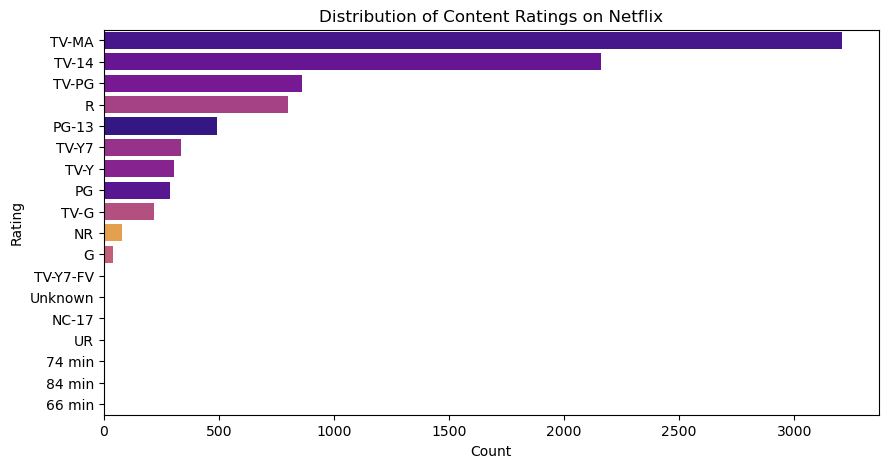

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, hue='rating', palette='plasma', legend=False)

plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


In [28]:
# Final Summary
print("✅ Netflix Dataset Analysis Completed Successfully!")
print("---------------------------------------------------")
print("🔹 Explored data distribution by type (Movies vs TV Shows)")
print("🔹 Identified top 10 countries with the most content")
print("🔹 Analyzed genre popularity and ratings distribution")
print("🔹 Visualized data insights using Seaborn and Matplotlib")

print("\n✨ Analysis shows Netflix offers diverse content globally,")
print("with a strong dominance of Movies and popular genres like Dramas and Documentaries.")
print("End of Report.")


✅ Netflix Dataset Analysis Completed Successfully!
---------------------------------------------------
🔹 Explored data distribution by type (Movies vs TV Shows)
🔹 Identified top 10 countries with the most content
🔹 Analyzed genre popularity and ratings distribution
🔹 Visualized data insights using Seaborn and Matplotlib

✨ Analysis shows Netflix offers diverse content globally,
with a strong dominance of Movies and popular genres like Dramas and Documentaries.
End of Report.
